<a href="https://colab.research.google.com/github/c-mmonteiro/t1-algo-feature/blob/main/Trabaho1_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook do Trabalho de Feature Enginearing para a disciplina de Algoritmos Baseados em Dados para Problemas de Ciência e Engenharia.
Aluno: Carlos A M Monteiro

# 1. Conjunto de Dados

## 1.1 Importa os dados de Plano de Saúde

In [6]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("steve1215rogg/student-lifestyle-dataset")

print("Path to dataset files:", path)

dados = pd.read_csv(path + "/student_lifestyle_dataset.csv")
dados.head()

Using Colab cache for faster access to the 'student-lifestyle-dataset' dataset.
Path to dataset files: /kaggle/input/student-lifestyle-dataset


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [4]:
dados['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [7]:
dados.drop(columns=['Student_ID'], inplace=True)
dados['Stress_Level'] = dados['Stress_Level'].map({'Moderate': 1, 'Low': 0, 'High': 2})
dados

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,1
1996,6.3,2.8,8.8,1.5,4.6,2.65,1
1997,6.2,0.0,6.2,0.8,10.8,3.14,1
1998,8.1,0.7,7.6,3.5,4.1,3.04,2


## 1.2 Gráficos dos dados em relação a saída

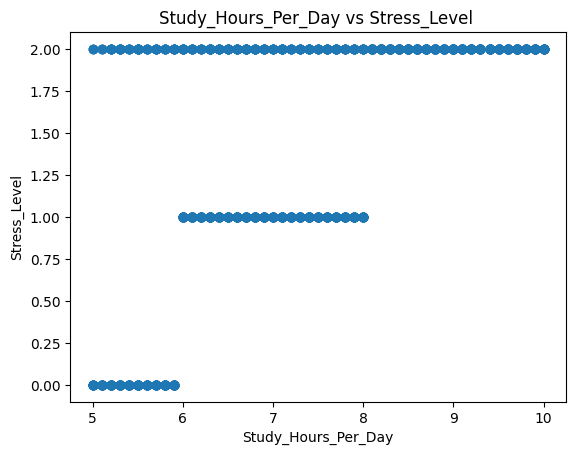

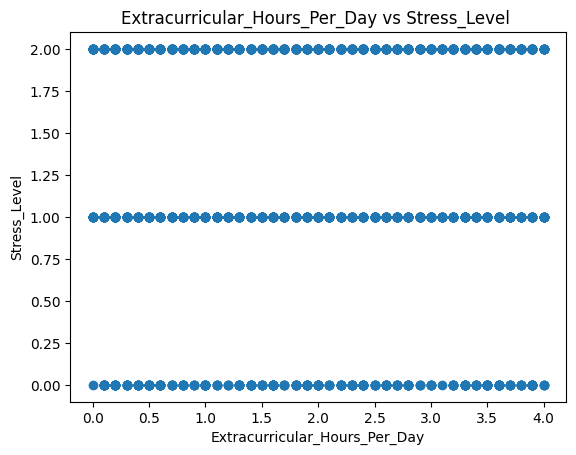

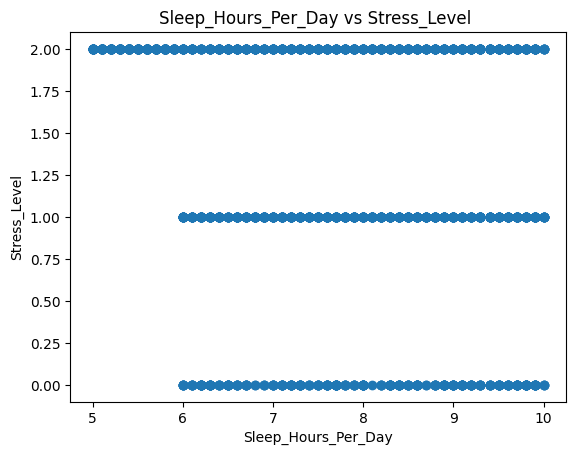

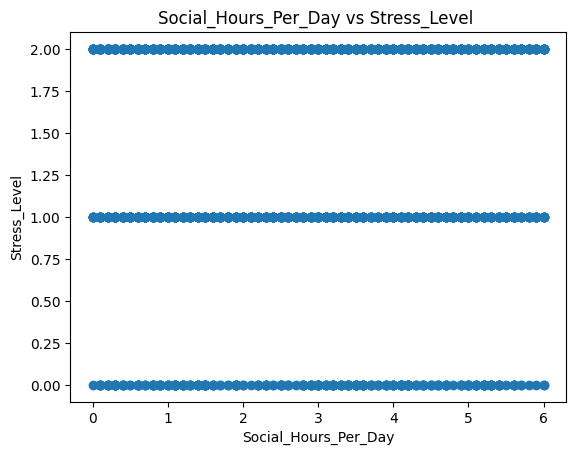

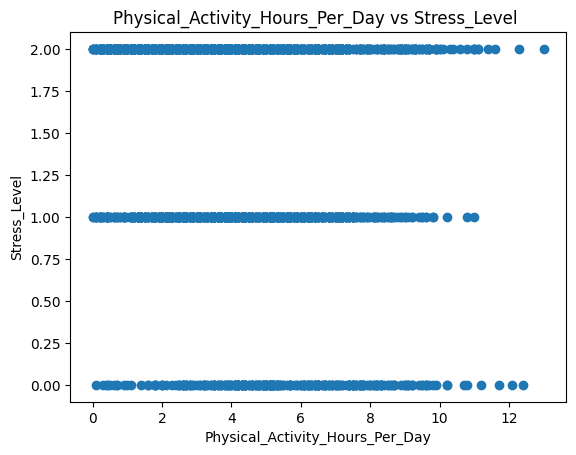

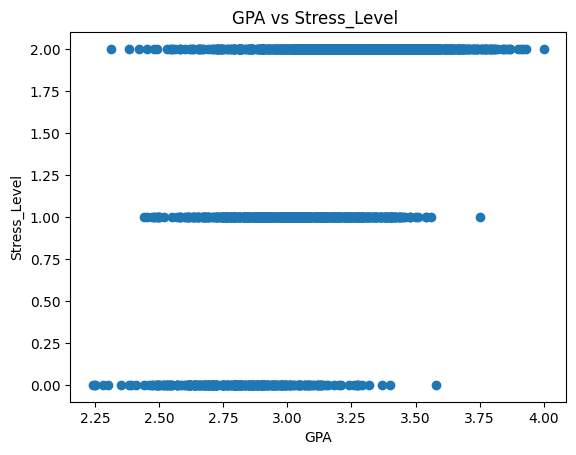

In [8]:
from matplotlib import pyplot as plt
colunas = dados.columns[:-1]
y_col = dados.columns[-1]

for idx, col in enumerate(colunas):
    plt.plot(dados[col], dados[y_col], 'o')
    plt.title(f'{col} vs {y_col} ')
    plt.xlabel(col)
    plt.ylabel(y_col)
    plt.show()

## 1.3 Histograma dos dados

In [9]:
def determina_bins(x, bins_rule = 'fd'):
    if bins_rule == 'classic':
        bins = int(len(x)**0.5)
    elif bins_rule == 'sturges':
        bins = int(np.ceil(np.log2(len(x)) + 1))
    elif bins_rule == 'scott': #ótima para distribuição normal
        bins = int((np.max(x) - np.min(x)) / (3.5 * np.std(x) * len(x)**(-1/3)))
    elif bins_rule == 'fd': #mais robusta para outliers
        bins = int((np.max(x) - np.min(x)) / (2 * (np.percentile(x, 75) - np.percentile(x, 25)) * len(x)**(-1/3)))

    return bins

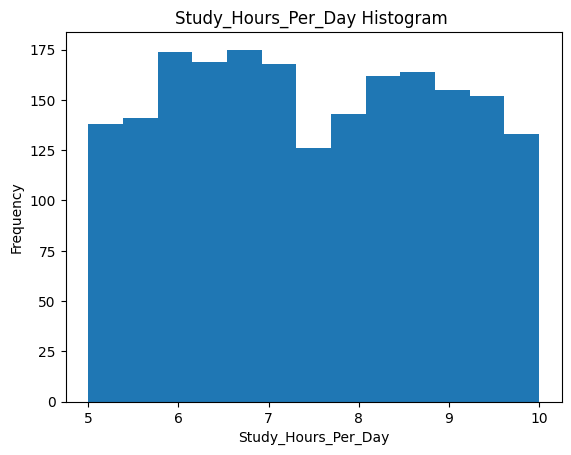

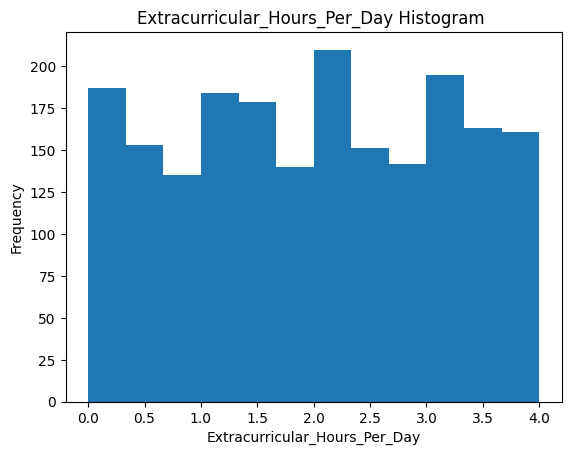

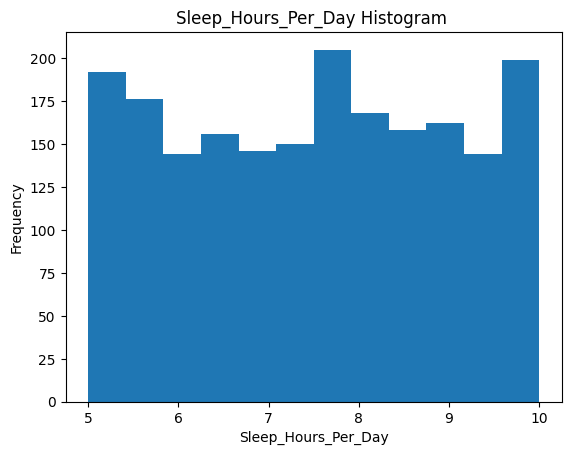

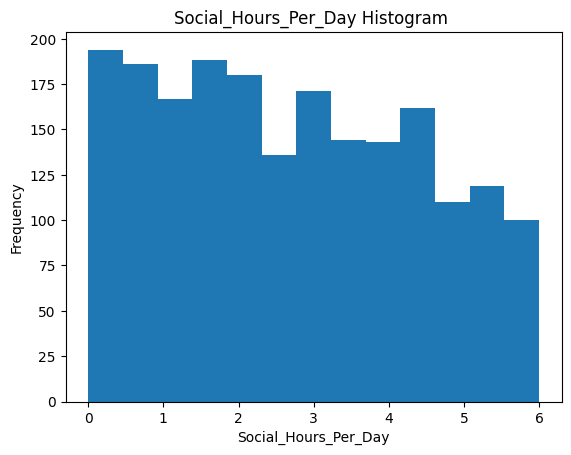

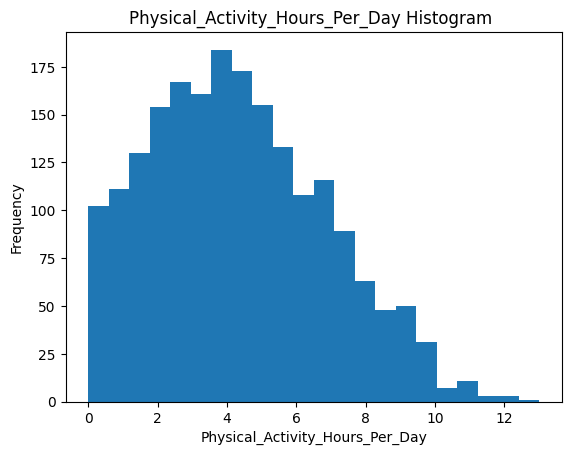

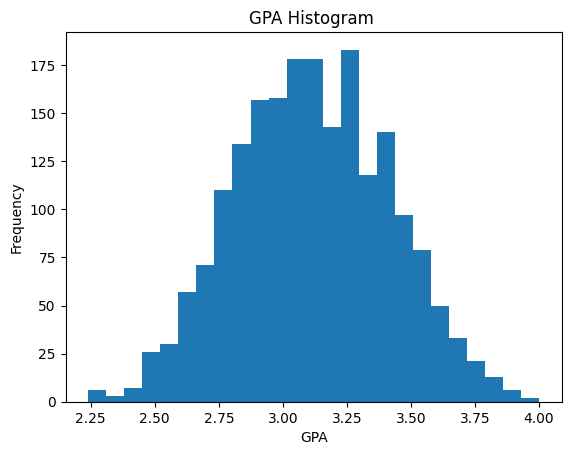

In [10]:
from matplotlib import pyplot as plt
colunas = dados.columns[:-1]

for idx, col in enumerate(colunas):
    plt.hist(dados[col], bins=determina_bins(dados[col]))
    plt.title(f'{col} Histogram ')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#  2. Modificações nos dados

## 2.1 Converte os dados para distribuição

In [11]:
import numpy as np
import bisect

def converte_bins(x):
    '''
    Converte a coluna x em bins discretos.
    Parâmetros:
    x: array-like, coluna a ser convertida.
    bins: int, número de bins.
    Retorna:
    array-like, coluna
    '''
    edge = np.linspace(x.min(), x.max(), determina_bins(x)+1)

    x_bins = []
    for xi in x:
      x_bins.append(bisect.bisect_left(edge, xi))
    return x_bins

In [12]:
dados_bins = pd.DataFrame()
for col in colunas:
    dados_bins[col] = converte_bins(dados[col])
dados_bins

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,5,12,9,7,4,11
1,1,11,8,10,6,8
2,1,12,11,3,8,7
3,4,7,6,4,11,10
4,9,2,4,5,12,19
...,...,...,...,...,...,...
1995,4,1,6,5,14,16
1996,4,9,10,4,8,6
1997,4,0,3,2,19,13
1998,9,3,7,8,7,12


# 2.2 Transformações

In [8]:

!pip install optuna

Primeiramente determina-se o valor de alpha por meio do Optuna e depois aplica a transformação x' = x**alpha.



In [54]:
from scipy.stats import shapiro
import optuna as opt

opt.logging.set_verbosity(opt.logging.CRITICAL)

def objective(trial, col_idx):
    col = dados.columns[col_idx]
    alpha = trial.suggest_float('alpha', -1.0, 1.0)
    coluna_modificada = dados[col]
    try:
        dados_transf = coluna_modificada**alpha
        if np.any(np.isnan(dados_transf)) or np.any(np.isinf(dados_transf)):
            return -np.inf  # penaliza soluções inválidas
        stat, p = shapiro(dados_transf)
        return stat
    except Exception:
        return -np.inf

print(f'              Coluna             | Alfa')
print(f'---------------------------------|-------------')
parametro_alpha_transformacao = []
for idx in range(len(dados.columns)-1):
    study = opt.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, idx), n_trials=100, show_progress_bar=False)
    print(f'{dados.columns[idx].ljust(32)} | {study.best_params["alpha"]:.3f}')
    parametro_alpha_transformacao.append(np.float64(study.best_params["alpha"]))

              Coluna             | Alfa
---------------------------------|-------------
Study_Hours_Per_Day              | 0.667
Extracurricular_Hours_Per_Day    | 0.806
Sleep_Hours_Per_Day              | 0.886
Social_Hours_Per_Day             | 0.670
Physical_Activity_Hours_Per_Day  | 0.670
GPA                              | 0.840


In [17]:
dados_transformados = pd.DataFrame()
for idx, col in enumerate(colunas):
    dados_transformados[col] = np.power(dados[col], parametro_alpha_transformacao[idx])

In [18]:
dados_transformados.isna().sum()

,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0


Mostrar os histogramas originais e dos dados transformados

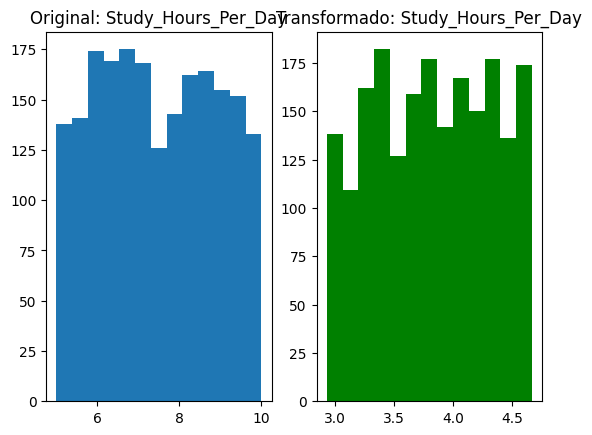

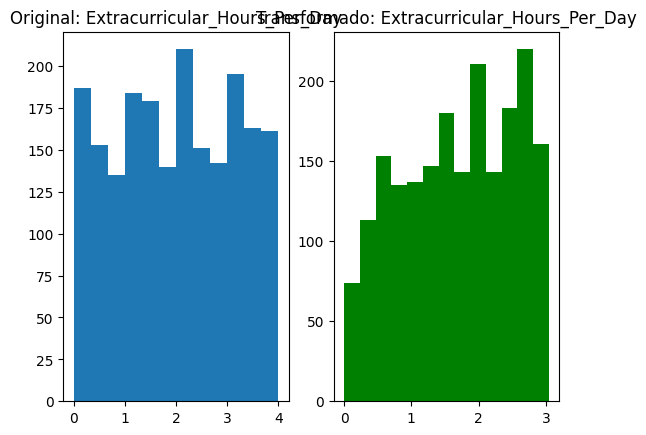

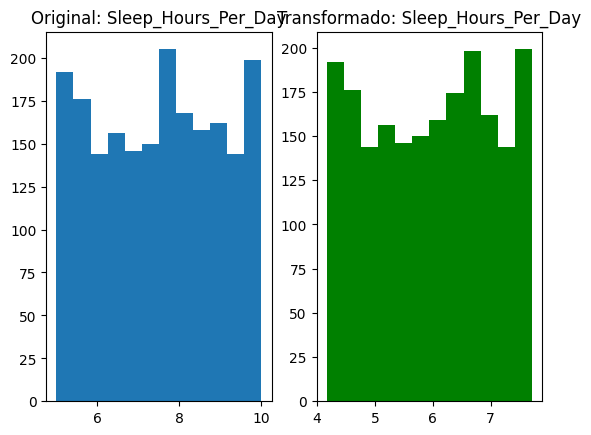

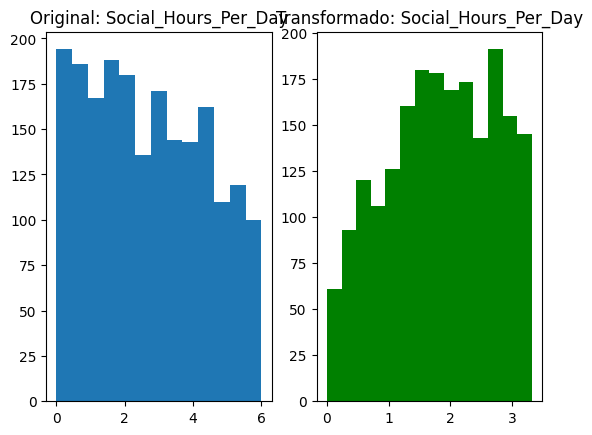

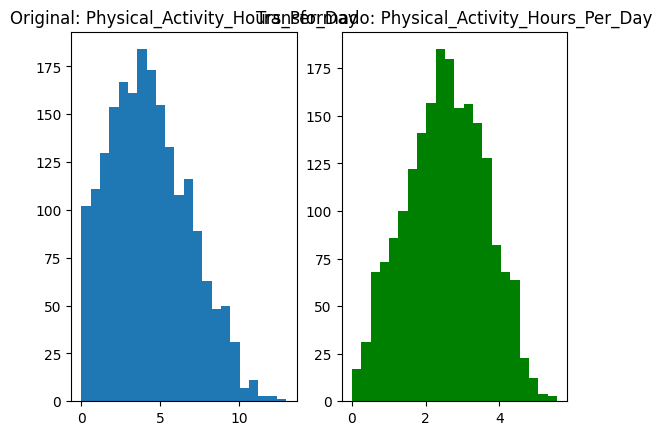

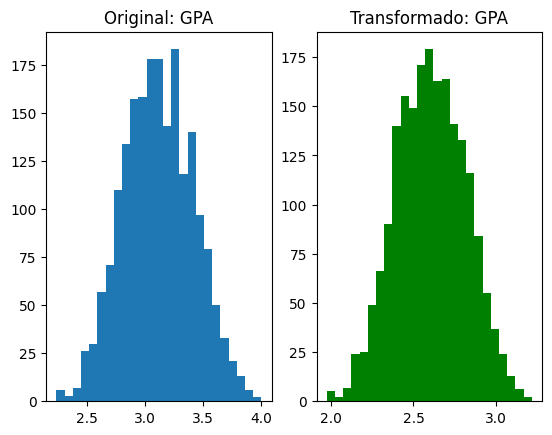

In [19]:
# Exemplo: mostrar histogramas antes e depois da transformação para cada coluna
import matplotlib.pyplot as plt

for idx in range(len(dados.columns)-1):
    col = dados.columns[idx]

    plt.subplot(1, 2, 1)
    plt.hist(dados[col], bins=determina_bins(dados[col]))
    plt.title(f'Original: {col}')
    plt.subplot(1, 2, 2)
    plt.hist(dados_transformados[col], bins=determina_bins(dados_transformados[col]), color= 'g')
    plt.title(f'Transformado: {col}')
    plt.show()

# 3. Cálculo das correlações entre os dados de entrada e a saída



## 3.1 Cálculo da *Mutual Information*

Calculo da *Mutual Information* por meio do hitograma. A forma de definir o número de bins pode ser escolhido entre os métodos Classico, Struges, Scoot e Freedman-Diaconis.

In [20]:
def calc_mi(x, y, bins_rule='classic'):
    '''Calcula a Mutual Information entre duas variáveis x e y usando histogramas.
    Parâmetros:
    x: array-like, primeira variável.
    y: array-like, segunda variável.
    bins_rule: str, regra para determinar o número de bins. Opções: 'classic', 'sturges', 'scott', 'fd'.
    Retorna:
    mi: float, valor da Mutual Information.
    '''

    bins_x = determina_bins(x, bins_rule)
    bins_y = determina_bins(y, bins_rule)

    hist2d, x_edges, y_edges = np.histogram2d(x, y, bins=[bins_x, bins_y])

    hist2d_norm = hist2d / np.sum(hist2d)

    hist_x = np.sum(hist2d_norm, axis=1)
    hist_y = np.sum(hist2d_norm, axis=0)

    entropia_x = -sum(hist_x[hist_x > 0] * np.log(hist_x[hist_x > 0]))
    entropia_y = -sum(hist_y[hist_y > 0] * np.log(hist_y[hist_y > 0]))

    entropia_conjunta = -sum(hist2d_norm[hist2d_norm > 0] * np.log(hist2d_norm[hist2d_norm > 0]))

    mi = entropia_x + entropia_y - entropia_conjunta

    return mi

**Dúvida:** Na minha cabeça faz mais sentido colocar os os métodos de determinação da bin como entrada, pode ser assim?

Testes da Mutual Information

In [56]:
bins_rule = ['classic', 'sturges', 'scott', 'fd']

print(f'  Teste do Mutual Information com os dados originais\n')
print(f'              Dado              | {bins_rule[0]} | {bins_rule[1]} |  {bins_rule[2]}  |  {bins_rule[3]}')
print(f'--------------------------------|---------|---------|---------|--------')
for idx, col in enumerate(colunas):
    bins_list = []
    for br in bins_rule:
        bins_list.append(calc_mi(dados[col], dados[y_col], bins_rule=br))
    print(f'{col.ljust(32)}|  {bins_list[0]:.3f}  |  {bins_list[1]:.3f}  |  {bins_list[2]:.3f}  |  {bins_list[3]:.3f}')


  Teste do Mutual Information com os dados originais

              Dado              | classic | sturges |  scott  |  fd
--------------------------------|---------|---------|---------|--------
Study_Hours_Per_Day             |  0.677  |  0.608  |  0.608  |  0.625
Extracurricular_Hours_Per_Day   |  0.018  |  0.004  |  0.004  |  0.004
Sleep_Hours_Per_Day             |  0.179  |  0.146  |  0.146  |  0.146
Social_Hours_Per_Day            |  0.024  |  0.010  |  0.010  |  0.007
Physical_Activity_Hours_Per_Day |  0.057  |  0.040  |  0.040  |  0.046
GPA                             |  0.209  |  0.192  |  0.202  |  0.204


Mutual Information, usando Freedman–Diaconis, aplicada aos dados originais, aos dados em bins e aos dados transformados.

In [58]:
print(f'               Dado             | Original | Transformado |    Bins')
print(f'--------------------------------|----------|--------------|--------------')
for idx, col in enumerate(colunas):
    mi_dados = calc_mi(dados[col], dados[y_col], bins_rule='fd')
    mi_transform = calc_mi(dados_transformados[col], dados[y_col], bins_rule='fd')
    mi_bins = calc_mi(dados_bins[col], dados[y_col], bins_rule='fd')

    print(f'{col.ljust(32)}|   {mi_dados:.3f}  |     {mi_transform:.3f}    |   {mi_bins:.3f}  ')

               Dado             | Original | Transformado |    Bins
--------------------------------|----------|--------------|--------------
Study_Hours_Per_Day             |   0.625  |     0.609    |   0.625  
Extracurricular_Hours_Per_Day   |   0.004  |     0.005    |   0.005  
Sleep_Hours_Per_Day             |   0.146  |     0.147    |   0.146  
Social_Hours_Per_Day            |   0.007  |     0.009    |   0.006  
Physical_Activity_Hours_Per_Day |   0.046  |     0.048    |   0.046  
GPA                             |   0.204  |     0.205    |   0.204  


Os 2 dados de maior correlação com a saída, considerando o Mutual Information, são *Study_Hours_Per_Day* e *GPA*.

## 3.2 Hilbert-Schmidt Independence Criterion (HSIC)

In [59]:
from sklearn.metrics.pairwise import rbf_kernel

def calc_hsic(x, y, sigma_x = None, sigma_y = None):

    x = np.asarray(x)
    y = np.asarray(y)

    len_x = len(x)

    H = np.eye(len_x) - np.ones((len_x, len_x))/len_x

    if sigma_x is None:
        sigma_x = np.median(np.abs(x[:, None] - x[None, :]))

    if sigma_y is None:
        sigma_y = np.median(np.abs(y[:, None] - y[None, :]))

    K = rbf_kernel(x.reshape(-1, 1), gamma=1/(2*sigma_x**2))
    L = rbf_kernel(y.reshape(-1, 1), gamma=1/(2*sigma_y**2))

    return np.trace(H @ K @ H @ L) / (len_x - 1)**2

**Dúvida:** Na minha cabeça faz mais sentido calcular o sigma para os dados inseridos, pode ser assim?

HSIC aplicada aos dados originais, aos dados em bins e aos dados transformados.

In [62]:
colunas = dados.columns[:-1]

print(f'             Dado               | Original | Transformado |    Bins')
print(f'--------------------------------|----------|--------------|--------------')
for idx, col in enumerate(colunas):
  hsic_dados = calc_hsic(dados[col], dados[y_col])
  hsic_transform = calc_hsic(dados_transformados[col], dados[y_col])
  hsic_bins = calc_hsic(dados_bins[col], dados[y_col])

  print(f'{col.ljust(32)}|  {hsic_dados:.5f} |    {hsic_transform:.5f}   |   {hsic_bins:.5f}  ')

             Dado               | Original | Transformado |    Bins
--------------------------------|----------|--------------|--------------
Study_Hours_Per_Day             |  0.04103 |    0.04055   |   0.03952  
Extracurricular_Hours_Per_Day   |  0.00002 |    0.00002   |   0.00002  
Sleep_Hours_Per_Day             |  0.00738 |    0.00753   |   0.00708  
Social_Hours_Per_Day            |  0.00026 |    0.00023   |   0.00024  
Physical_Activity_Hours_Per_Day |  0.00317 |    0.00318   |   0.00305  
GPA                             |  0.01810 |    0.01809   |   0.01827  


Os 2 dados de maior correlação com a saída, considerando o HSIC, são *Study_Hours_Per_Day* e *GPA*.

## Considerações

Considerando os resultados apresentados pela avaliação de correlação do Mutual Information e do HSIC concluimos que as entradas **Study_Hours_Per_Day** e **GPA** são as que tem maior correlação por ambos os métodos.

In [63]:
col_top = ["Study_Hours_Per_Day", "GPA"]

# 4. Avaliação com xgBoost + SHAP

## 4.1. Teste Inicial

Testa os dados originais, separados por bins e transformados com todos os atributos. Em seguida testa os mesmos, mas apenas com os melhores atributos definidos na list *col_top*.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
import xgboost

def evaluate_model_xgBoost(X, y, id):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f'{id.ljust(10)}|  {mse_train:.10f}  |  {mse:.10f}')

In [65]:
print(f'  Dado    |     Train      |  Test ')
print(f'----------|----------------|-------')
evaluate_model_xgBoost(dados[dados.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_bins[dados_bins.columns[:-1]], dados[y_col], 'Bins')
evaluate_model_xgBoost(dados_transformados[dados_transformados.columns[:-1]], dados[y_col], 'Transform')
print(f'TOP Atribu|----------------|-------')
evaluate_model_xgBoost(dados[col_top], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_bins[col_top], dados[y_col], 'Bins')
evaluate_model_xgBoost(dados_transformados[col_top], dados[y_col], 'Transform')


  Dado    |     Train      |  Test 
----------|----------------|-------
Dados     |  0.0000000010  |  0.0000000011
Bins      |  0.0023895234  |  0.0671193153
Transform |  0.0000000010  |  0.0000000011
TOP Atribu|----------------|-------
Dados     |  0.0550858788  |  0.2480267733
Bins      |  0.1872875243  |  0.1991864443
Transform |  0.0550858788  |  0.2480267733


## 4.2. Avaliação dos Atibutos Originais

### 4.2.1. Com *plot_importance*

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

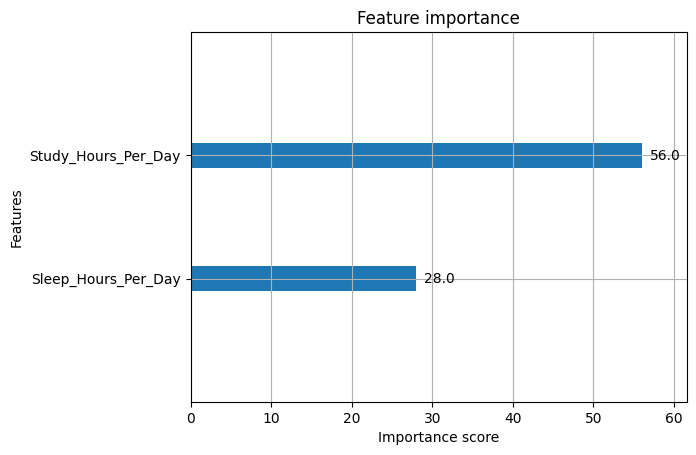

In [66]:
X_train, X_test, y_train, y_test = train_test_split(dados[dados.columns[:-1]], dados[y_col], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

xgboost.plot_importance(model)

### 4.2.2. Com SHAP

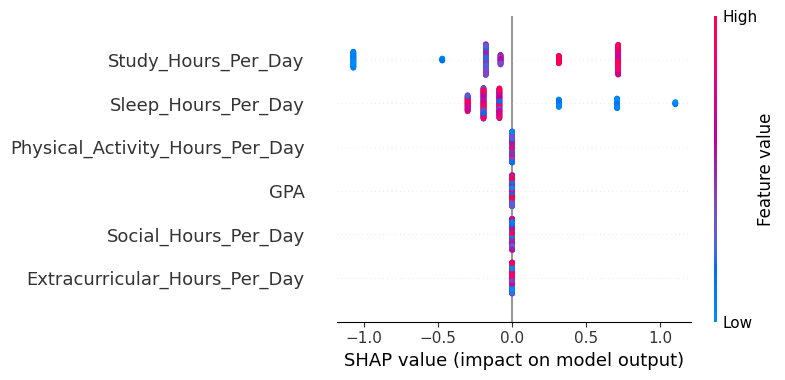

In [67]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.2.3. Teste Modelo


In [38]:
dados.columns

Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [68]:
col_feature = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']
col_shap = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']

print(f'  Dado    |     Train      |  Test ')
print(f'----------|----------------|-------')
evaluate_model_xgBoost(dados[dados.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados[col_feature], dados[y_col], 'Feature')
evaluate_model_xgBoost(dados[col_shap], dados[y_col], 'SHAP')

  Dado    |     Train      |  Test 
----------|----------------|-------
Dados     |  0.0000000010  |  0.0000000011
Feature   |  0.0000000010  |  0.0000000011
SHAP      |  0.0000000010  |  0.0000000011


## 4.3. Avaliação dos Atributos em Bins

### 4.3.1. Com *plot_importance*

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

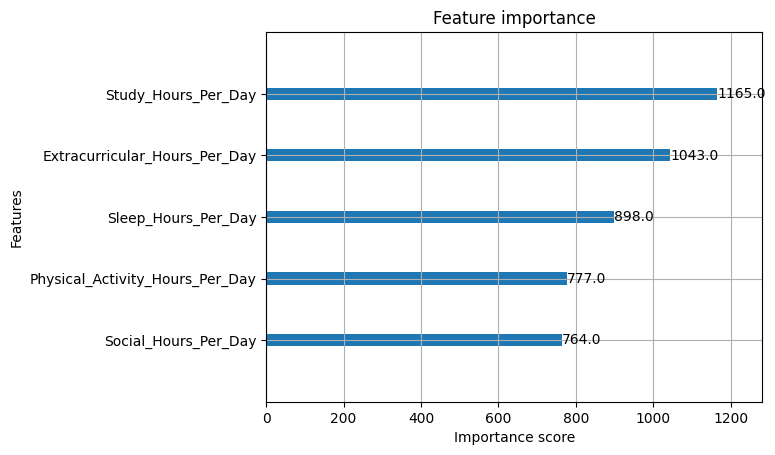

In [69]:
X_train, X_test, y_train, y_test = train_test_split(dados_bins[dados_bins.columns[:-1]], dados[y_col], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

xgboost.plot_importance(model)

### 4.3.2. Com SHAP

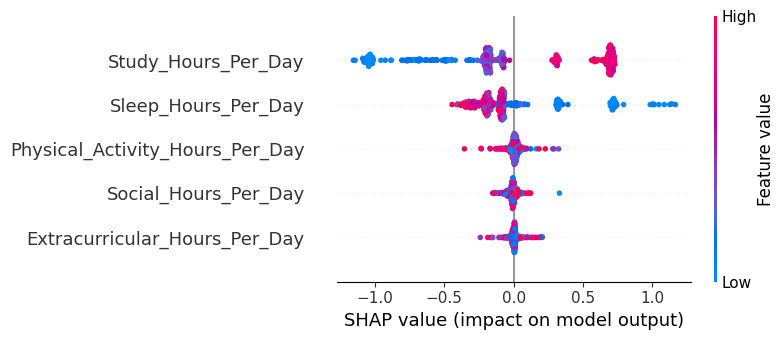

In [70]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.3.3. Teste Modelo

In [71]:
col_feature = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day']
col_shap = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']

print(f'  Dado    |     Train      |  Test ')
print(f'----------|----------------|-------')
evaluate_model_xgBoost(dados_bins[dados_bins.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_bins[col_feature], dados[y_col], 'Feature')
evaluate_model_xgBoost(dados_bins[col_shap], dados[y_col], 'SHAP')

  Dado    |     Train      |  Test 
----------|----------------|-------
Dados     |  0.0023895234  |  0.0671193153
Feature   |  0.1870341897  |  0.2069972605
SHAP      |  0.0319083109  |  0.0431212522


## 4.4. Avaliação dos Atributos Transformados

### 4.4.1. Com *plot_importance*

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

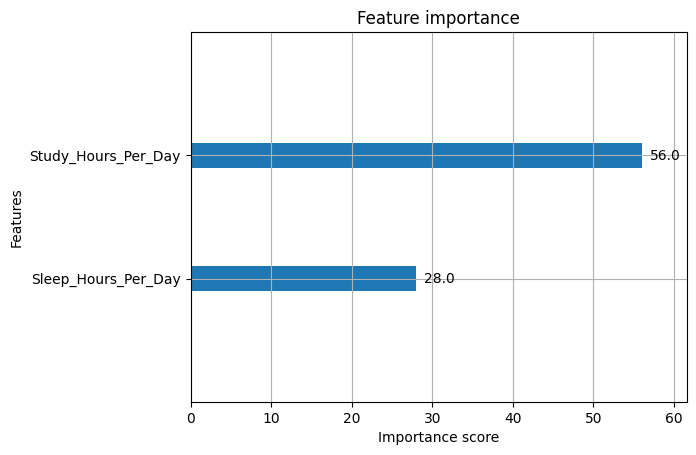

In [72]:
X_train, X_test, y_train, y_test = train_test_split(dados_transformados[dados_transformados.columns[:-1]], dados[y_col], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

xgboost.plot_importance(model)

### 4.4.2. Com SHAP

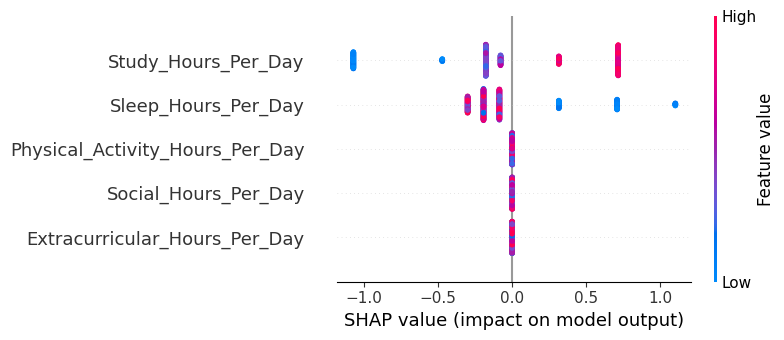

In [73]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.4.3. Teste Modelo



In [74]:
col_feature = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']
col_shap = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']

print(f'  Dado    |     Train      |  Test ')
print(f'----------|----------------|-------')
evaluate_model_xgBoost(dados_transformados[dados_transformados.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_transformados[col_feature], dados[y_col], 'Feature')
evaluate_model_xgBoost(dados_transformados[col_shap], dados[y_col], 'SHAP')

  Dado    |     Train      |  Test 
----------|----------------|-------
Dados     |  0.0000000010  |  0.0000000011
Feature   |  0.0000000010  |  0.0000000011
SHAP      |  0.0000000010  |  0.0000000011
